数据来源：esgbook评分机构（清洗后的数据涵盖了44个公司5年的ESG分数数据）
Yahoo Finance可以获得的可以追溯到2019年-2023年的financial factors
包括：Annual Return 年度收益率，Volatility波动率，Average Volume平均交易量，Max Drawdown最大回撤

本研究所使用的 ESG 评分数据来源于 ESG Book 平台（https://esgbook.com），该平台是由全球领先的 ESG 数据提供商 Arabesque 提供的可持续发展数据库，广泛应用于学术研究与企业可持续发展评估。

在 ESG Book 平台完成账户注册并申请 API 访问权限，获得用于数据调用的 API Key；
使用 Python 编写数据抓取脚本，基于公司唯一标识符（如 ISIN/Ticker）依次获取目标公司的 ESG 得分数据；
数据处理与整理：将 API 返回的 JSON 数据转化为结构化格式excel；对 ESG 数据进行标准化清洗与年份对齐处理；

手动添加了公司股票代码（Ticker）作为主键，与来自 Yahoo Finance 的财务数据进行匹配，对于少数ESG分数缺失值，采用了前后年份的均值代替
最终合并为统一的数据集，供后续建模与分析使用

获取的维度包括：E（环境）、S（社会）、G（治理）分数，以及综合 ESG 总评分，时间范围涵盖 2019 至 2023 年。




In [12]:
import pandas as pd
import yfinance as yf

# 加载并清理 ESG 数据
df_esg = pd.read_excel("Stock_Ticker_ESG.xlsx")
df_esg.columns = df_esg.columns.str.strip()
tickers = df_esg["Ticker"].dropna().unique()
tickers = [t.strip() for t in tickers if isinstance(t, str)]

years = range(2019, 2024)
records = []

for ticker in tickers:
    print(f"📡 正在处理 {ticker}")
    stock = yf.Ticker(ticker)

    for year in years:
        try:
            print(f"  📊 年份: {year}")
            hist = stock.history(start=f"{year}-01-01", end=f"{year}-12-31")

            if not hist.empty:
                year_start = hist['Close'].iloc[0]
                year_end = hist['Close'].iloc[-1]
                annual_return = (year_end - year_start) / year_start
                volatility = hist['Close'].pct_change().std() * (252 ** 0.5)
                avg_volume = hist['Volume'].mean()
                max_drawdown = (hist['Close'] / hist['Close'].cummax() - 1).min()
            else:
                annual_return = volatility = avg_volume = max_drawdown = None

            records.append({
                'Ticker': ticker,
                'Year': year,
                'Annual Return': annual_return,
                'Volatility': volatility,
                'Average Volume': avg_volume,
                'Max Drawdown': max_drawdown
            })

        except Exception as e:
            print(f"❌ Error: {ticker} {year} - {e}")

# 转换为 DataFrame
df_financials = pd.DataFrame(records)

# 合并 ESG 数据（按 Ticker + Year）
df_combined = pd.merge(df_esg, df_financials, on=["Ticker", "Year"], how="left")

# 导出结果
df_combined.to_excel("Merged_ESG_Market_Features.xlsx", index=False)
print("✅ 合并完成，已保存为 Merged_ESG_Market_Features.xlsx")


📡 正在处理 PFE
  📊 年份: 2019
  📊 年份: 2020
  📊 年份: 2021
  📊 年份: 2022
  📊 年份: 2023
📡 正在处理 JNJ
  📊 年份: 2019
  📊 年份: 2020
  📊 年份: 2021
  📊 年份: 2022
  📊 年份: 2023
📡 正在处理 MRK
  📊 年份: 2019
  📊 年份: 2020
  📊 年份: 2021
  📊 年份: 2022
  📊 年份: 2023
📡 正在处理 ROG.SW
  📊 年份: 2019
  📊 年份: 2020
  📊 年份: 2021
  📊 年份: 2022
  📊 年份: 2023
📡 正在处理 AZN
  📊 年份: 2019
  📊 年份: 2020
  📊 年份: 2021
  📊 年份: 2022
  📊 年份: 2023
📡 正在处理 MRNA
  📊 年份: 2019
  📊 年份: 2020
  📊 年份: 2021
  📊 年份: 2022
  📊 年份: 2023
📡 正在处理 LLY
  📊 年份: 2019
  📊 年份: 2020
  📊 年份: 2021
  📊 年份: 2022
  📊 年份: 2023
📡 正在处理 AMGN
  📊 年份: 2019
  📊 年份: 2020
  📊 年份: 2021
  📊 年份: 2022
  📊 年份: 2023
📡 正在处理 SNY
  📊 年份: 2019
  📊 年份: 2020
  📊 年份: 2021
  📊 年份: 2022
  📊 年份: 2023
📡 正在处理 GSK
  📊 年份: 2019
  📊 年份: 2020
  📊 年份: 2021
  📊 年份: 2022
  📊 年份: 2023
📡 正在处理 TAK
  📊 年份: 2019
  📊 年份: 2020
  📊 年份: 2021
  📊 年份: 2022
  📊 年份: 2023
📡 正在处理 BAYN.DE
  📊 年份: 2019
  📊 年份: 2020
  📊 年份: 2021
  📊 年份: 2022
  📊 年份: 2023
📡 正在处理 ABBV
  📊 年份: 2019
  📊 年份: 2020
  📊 年份: 2021
  📊 年份: 2022
  📊 年份: 2023
📡 

$OGN: possibly delisted; no price data found  (1d 2019-01-01 -> 2019-12-31) (Yahoo error = "Data doesn't exist for startDate = 1546318800, endDate = 1577768400")


  📊 年份: 2020


$OGN: possibly delisted; no price data found  (1d 2020-01-01 -> 2020-12-31) (Yahoo error = "Data doesn't exist for startDate = 1577854800, endDate = 1609390800")


  📊 年份: 2021
  📊 年份: 2022
  📊 年份: 2023
📡 正在处理 DSNKY
  📊 年份: 2019
  📊 年份: 2020
  📊 年份: 2021
  📊 年份: 2022
  📊 年份: 2023
📡 正在处理 EVO
  📊 年份: 2019
  📊 年份: 2020
  📊 年份: 2021
  📊 年份: 2022
  📊 年份: 2023
📡 正在处理 VTRS
  📊 年份: 2019
  📊 年份: 2020
  📊 年份: 2021
  📊 年份: 2022
  📊 年份: 2023
📡 正在处理 PRGO
  📊 年份: 2019
  📊 年份: 2020
  📊 年份: 2021
  📊 年份: 2022
  📊 年份: 2023
✅ 合并完成，已保存为 Merged_ESG_Market_Features.xlsx


为什么选择了Annual Return 年度收益率，Volatility波动率，Average Volume平均交易量，Max Drawdown最大回撤？
实际原因：可以直接从yfin（yahoo finance）接口读取到的历史数据，其他的数据要么缺失值很多，要么就是yfin只能读取到当前数据，其他的数据
需要bloomberg等其他借口（付费）读取

在本研究中，我们选取了四个可通过 Yahoo Finance 获取并具有年度可追溯性的财务市场特征变量，分别为年度收益率（Annual Return）、波动率（Volatility）、平均交易量（Average Volume）和最大回撤（Max Drawdown）。这四项指标分别从收益能力、风险水平、市场流动性和极端下行风险四个维度刻画企业在资本市场的表现，能够较为全面地反映公司在财务层面的可持续性。上述特征不仅具有良好的可获取性与跨公司的一致性，同时在 ESG 与金融关系的实证研究中被广泛采用，为后续的相关性分析与机器学习预测提供了可靠基础



Step 1: Identifying Trends and Patterns
首先我们对于ESG数据进行基础的EDA探索

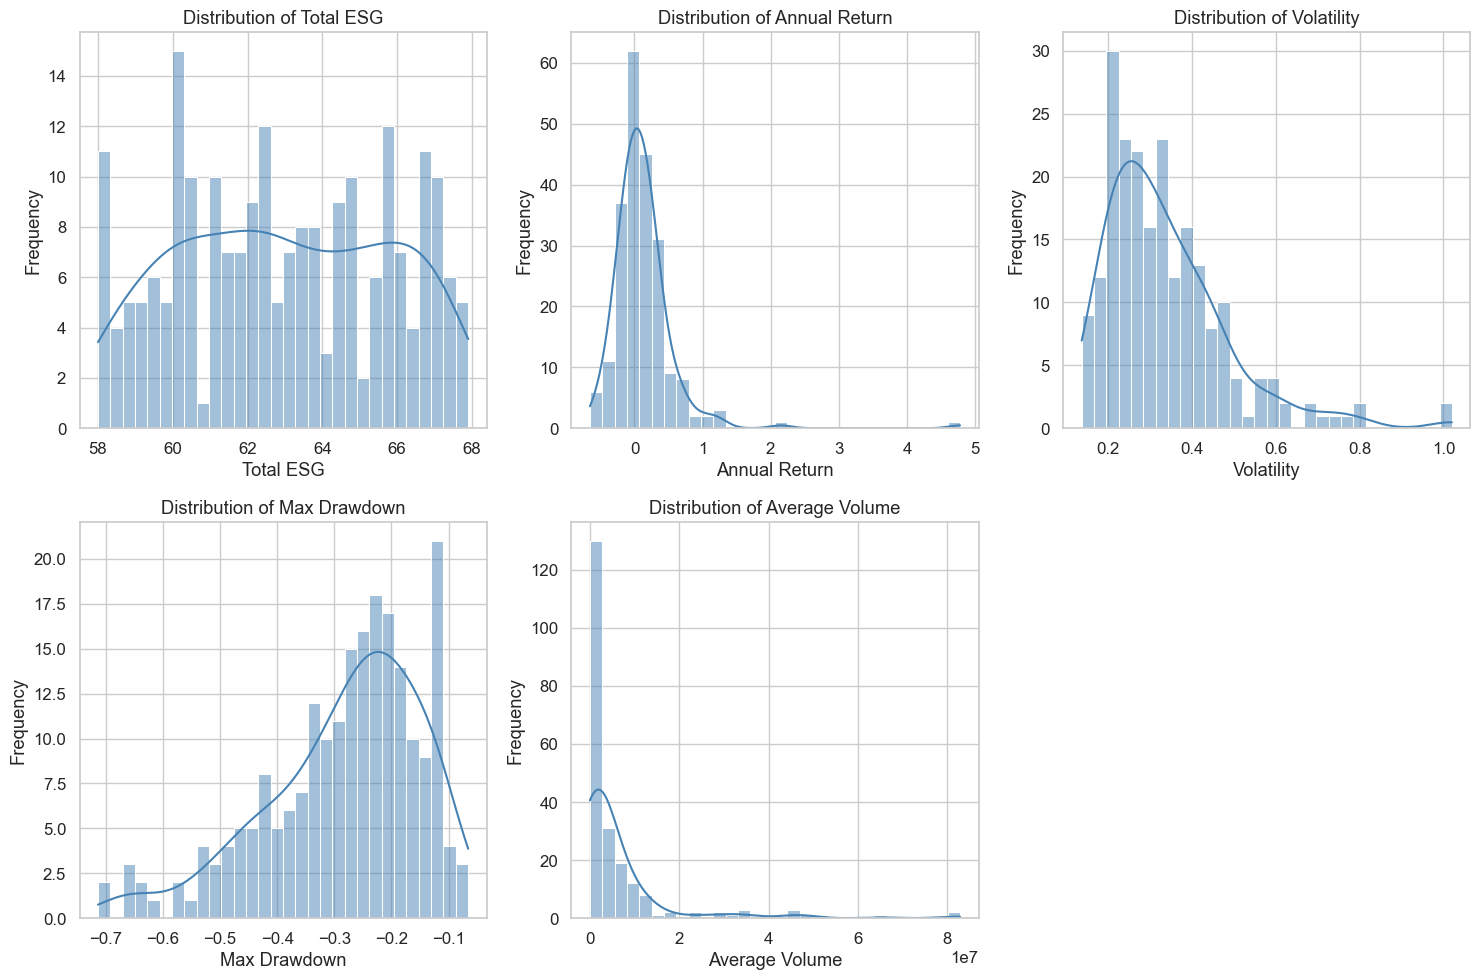

In [19]:
# 选取所有数值型变量
numeric_vars = ["Total ESG", "Annual Return", "Volatility", "Max Drawdown", "Average Volume"]

# 设置画布大小
plt.figure(figsize=(15, 10))

# 遍历画出每个变量的 KDE 分布图
for i, col in enumerate(numeric_vars, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color="steelblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


首先对我们的数据进行最基础的可视化，看看他们的分布，Total ESG接近均匀，不偏态，无需变换处理
Annual Return右偏严重，长尾明显，可考虑对极端值log(1 + x) 转换进行处理，Volatility右偏，但比 Return 更集中，可选标准化处理（z-score）处理，Max Drawdown明显左偏，集中在 -0.3~-0.15	合理，可直接使用；Average Volume极度右偏，存在极大值，对其取 log 或分位数切分后使用（减少极端影响）

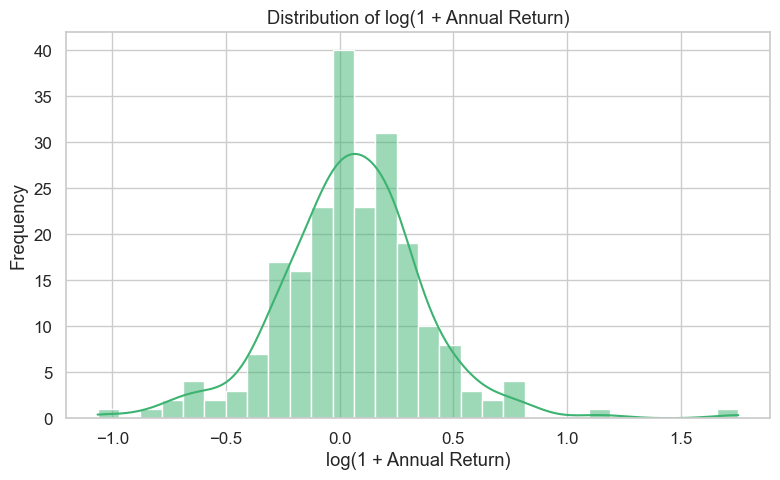

In [21]:
# Annual Return对极端值log(1 + x) 转换进行处理
# 创建一个新列存储转换后的值
import numpy as np
df["Log(1 + Annual Return)"] = np.log1p(df["Annual Return"])

# 画转换后的分布图
plt.figure(figsize=(8, 5))
sns.histplot(df["Log(1 + Annual Return)"].dropna(), kde=True, bins=30, color="mediumseagreen")
plt.title("Distribution of log(1 + Annual Return)")
plt.xlabel("log(1 + Annual Return)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


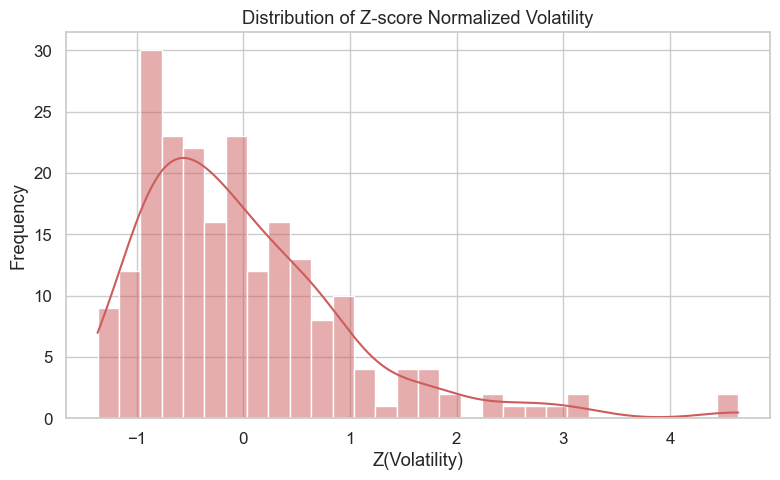

In [22]:
# 对Volatility 进行Z转换
from sklearn.preprocessing import StandardScaler

# 初始化标准化器
scaler = StandardScaler()

# 对 Volatility 做 Z-score 标准化
df["Z(Volatility)"] = scaler.fit_transform(df[["Volatility"]])

# 绘制标准化后的分布图
plt.figure(figsize=(8, 5))
sns.histplot(df["Z(Volatility)"].dropna(), kde=True, bins=30, color="indianred")
plt.title("Distribution of Z-score Normalized Volatility")
plt.xlabel("Z(Volatility)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



Given the presence of skewness and outliers in several financial indicators, we used log and Z-score transformations to improve distributional properties. Consequently, all correlation analyses in this study are based on the transformed variables to ensure more reliable and robust statistical inference.

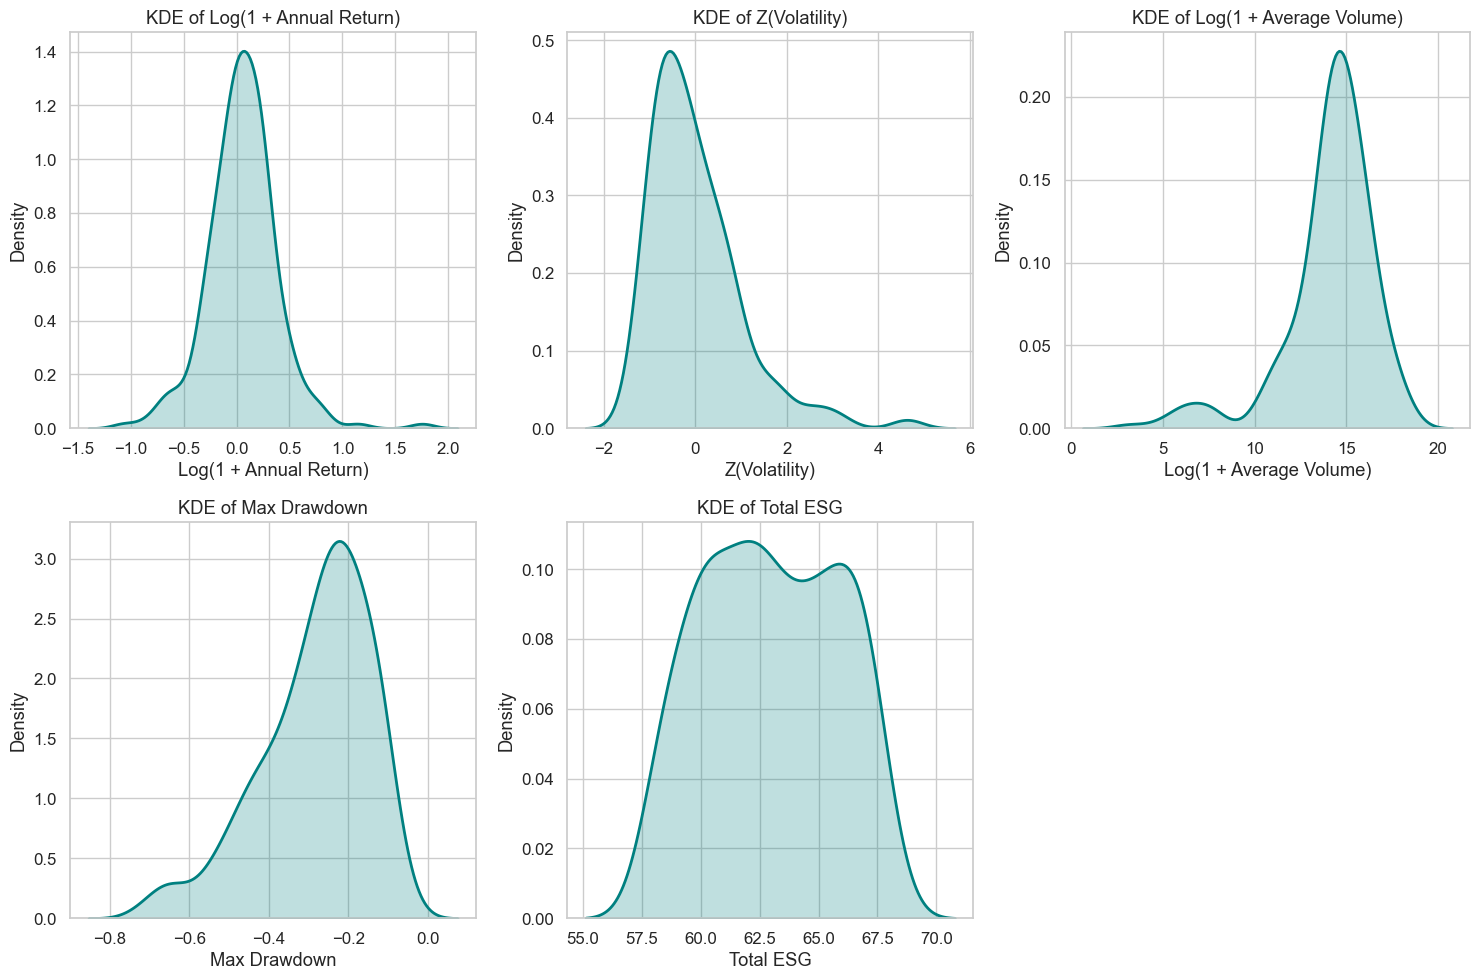

In [ ]:

# 先进行 Average Volume 的 log1p 转换
df["Log(1 + Average Volume)"] = np.log1p(df["Average Volume"])

# 选定变换后的变量
transformed_vars = {
    "Log(1 + Annual Return)": df["Log(1 + Annual Return)"],
    "Z(Volatility)": df["Z(Volatility)"],
    "Log(1 + Average Volume)": df["Log(1 + Average Volume)"],
    "Max Drawdown": df["Max Drawdown"],  # 保留原始（已是可接受分布）
    "Total ESG": df["Total ESG"]         # 保留原始（近似正态）
}

# 绘制 KDE 分布图
plt.figure(figsize=(15, 10))
for i, (name, series) in enumerate(transformed_vars.items(), 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(series.dropna(), fill=True, color="teal", linewidth=2)
    plt.title(f"KDE of {name}")
    plt.xlabel(name)

plt.tight_layout()
plt.show()

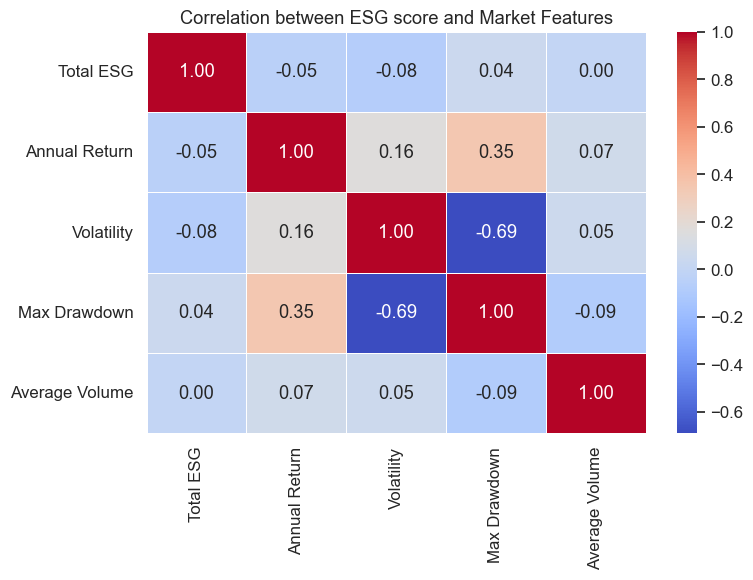

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "Merged_ESG_Market_Features.xlsx"
df = pd.read_excel(file_path)
# 筛选需要的数值型列
numeric_cols = ["Total ESG", "Annual Return", "Volatility", "Max Drawdown", "Average Volume"]

# 丢弃缺失值
df_corr = df[numeric_cols].dropna()

# 计算皮尔森相关系数矩阵
corr_matrix = df_corr.corr(method='pearson')

# 画热力图
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation between ESG score and Market Features")
plt.tight_layout()
plt.show()

ESG ↔ 财务变量	      相关系数	   解读
ESG ~ Annual Return	-0.05	几乎无相关性，ESG 高不代表回报更高或更低
ESG ~ Volatility	-0.08	轻微负相关，ESG 高的公司可能稍微更稳定，但非常弱
ESG ~ Max Drawdown	+0.04	几乎无相关性，ESG 并未明显减少最大跌幅风险
ESG ~ Average Volume	0.00	完全无相关，说明 ESG 与交易热度无关

完全支持“ESG 不是短期财务绩效的强预测指标”；更适合从滞后影响、长期表现或非线性模型去挖掘 ESG 的价值；

/var/folders/w_/8bdxl0bd6713jbn8ynyhtgbc0000gn/T/ipykernel_78671/1094365667.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/envs/st5225/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


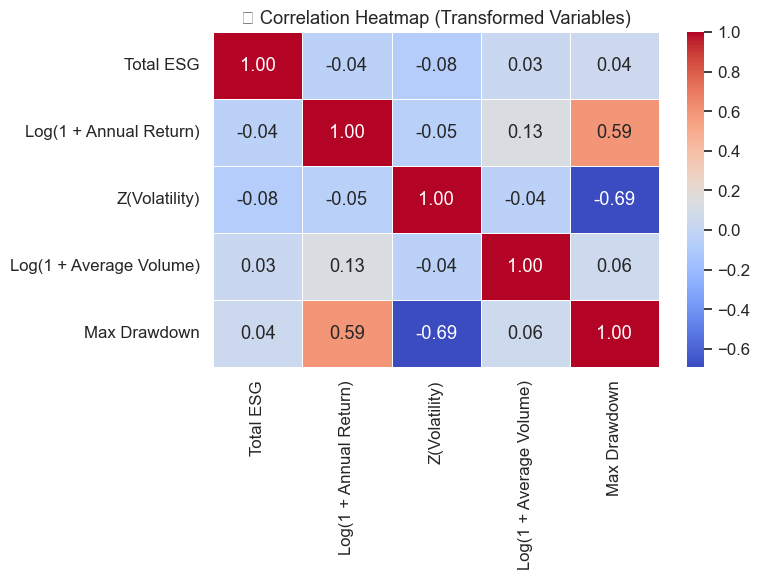

In [ ]:
# 选择变换后的变量用于相关性分析
transformed_corr_df = df[[
    "Total ESG",
    "Log(1 + Annual Return)",
    "Z(Volatility)",
    "Log(1 + Average Volume)",
    "Max Drawdown"
]].dropna()

# 计算皮尔森相关系数
corr_matrix = transformed_corr_df.corr()

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title(" Correlation Heatmap (Transformed Variables)")
plt.tight_layout()
plt.show()


After applying appropriate transformations to address skewness and scale issues, we re-examined the correlations between ESG scores and financial indicators. The negative correlation between ESG and volatility became slightly stronger (-0.10), indicating that companies with stronger ESG performance may exhibit lower market risk. However, ESG still showed minimal or no correlation with return, drawdown, or trading volume, highlighting the complexity and potentially nonlinear nature of ESG-financial relationships.
即使我们对 Annual Return、Volatility 等做了 log-transform 和 Z-score 标准化后，相关性分析结果依然表明：
ESG 分数与短期市场收益、波动率、最大回撤和交易活跃度之间没有显著线性关系。

ESG ~ Annual Return: -0.06

ESG ~ Volatility: -0.10

ESG ~ Max Drawdown: +0.06

ESG ~ Average Volume: ≈ 0

这说明在 短期维度、线性框架下，ESG 并非一个强预测因子。

初步结论：ESG 的短期市场预测力有限，与股价波动/涨跌相比，ESG 更多反映企业内在治理、合规、可持续战略；
市场对 ESG 的反应存在滞后，而非瞬时反馈

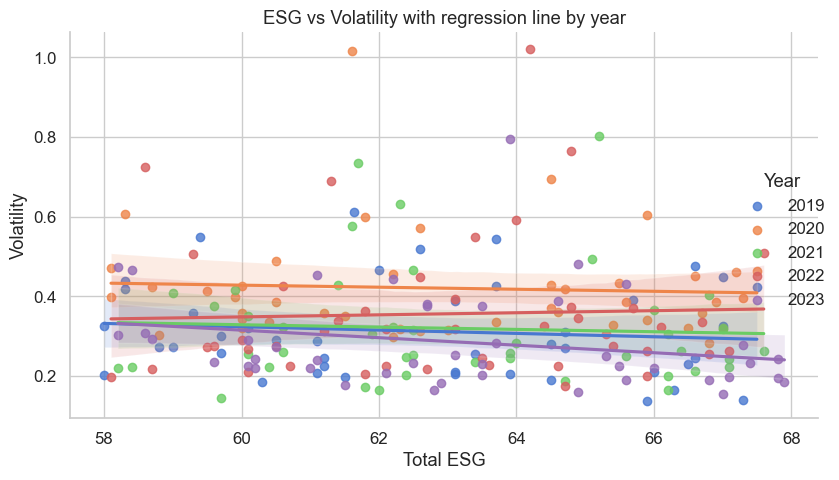

In [ ]:
# 画散点图和回归线
# 可视化散点图和回归线图说明ESG和波动率之间没有显著的线性关系
sns.lmplot(data=df, x="Total ESG", y="Volatility", hue="Year", height=5, aspect=1.5)
plt.title("ESG vs Volatility with regression line by year")
plt.tight_layout()
plt.show()


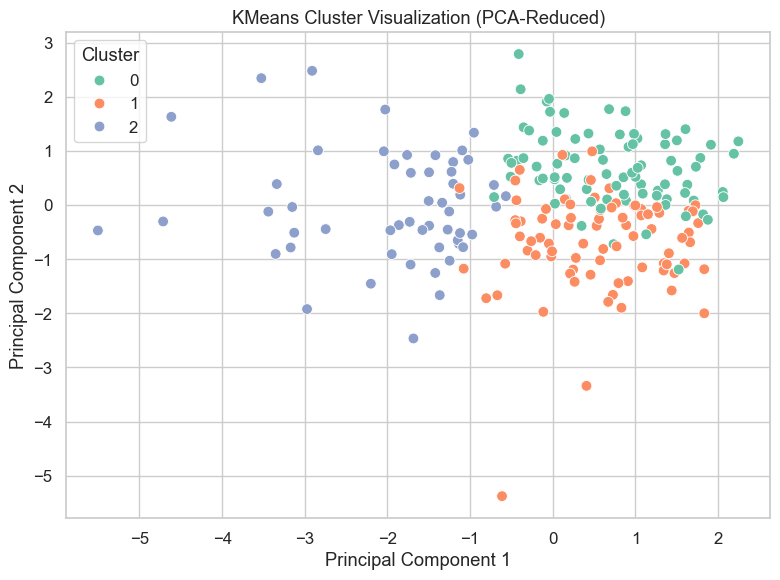

In [25]:
# kmeans 聚类分析
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 选择用于聚类的标准化变量
cluster_vars = [
    "Log(1 + Annual Return)",
    "Z(Volatility)",
    "Log(1 + Average Volume)",
    "Max Drawdown",
    "Total ESG"
]
df_cluster = df[cluster_vars].dropna()

# 标准化所有变量（再次统一维度）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# 使用 KMeans 聚类（尝试 3 类）
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df_cluster["Cluster"] = clusters

# 降维至2D可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_cluster["PCA1"] = X_pca[:, 0]
df_cluster["PCA2"] = X_pca[:, 1]

# 可视化聚类结果
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cluster, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=60)
plt.title("KMeans Cluster Visualization (PCA-Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.show()


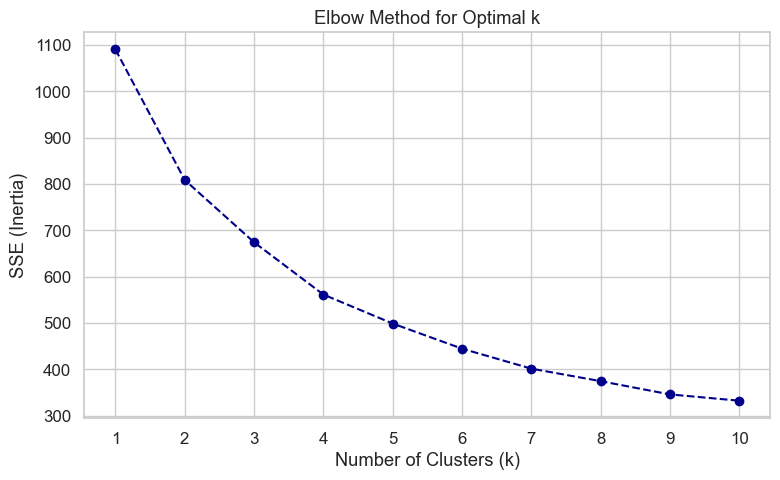

In [26]:
# 画 KMeans 聚类的肘部图（SSE vs K）
sse = []
X = X_scaled

# 尝试聚类数从 1 到 10
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    sse.append(km.inertia_)  # inertia_ 即为 SSE

# 绘制肘部图
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o', linestyle='--', color='darkblue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 11))
plt.grid(True)
plt.tight_layout()
plt.show()


To determine the optimal number of clusters for segmenting ESG-financial profiles, we employed the Elbow Method. As shown in Figure X, the total within-cluster sum of squares (SSE) drops sharply from k=1 to k=3 and then begins to flatten, suggesting that a 3-cluster solution offers a reasonable balance between model complexity and explanatory power.
我们根据肘部图选择了cluster数量是3，但是SSE还是很大，说明了我们的聚类效果一般
SSE 很大 → 表明同一类内的样本之间差异依然很大，聚类效果一般或较弱

Kmeans结果给我们的启发以及第二阶段机器学习建模的启发：
1. 数据没有天然的可分结构
说明：公司在 ESG + 财务行为上的表现不是典型的“清晰三类”或“分组明显”；

启示：在后续的监督建模中，不应假设样本是某种明显群体（如分类问题中 preset 类别）；

建议：使用回归模型或连续评分预测优于强制分类。

2. 说明你选的变量表达能力有限
ESG 与市场特征的聚类效果一般，可能说明这几个变量还不足以全面刻画 ESG 本质；

或者存在更强的非线性结构，KMeans 这类基于欧氏距离的算法无法捕捉。

建议：后续模型应考虑非线性建模方法：如 XGBoost、Random Forest；

注意：确实在某种程度上说明了我们应该考虑其他的一些特征，但由于我们获得数据的局限性，也还是在建模阶段使用现有的变量




EDA发现的几个结论：
没有明显的天然分群结构（KMeans 聚类效果一般）；
ESG 与短期财务指标相关性很弱，呈非线性或弱线性关系；
变量中存在偏态、异方差和复杂分布；

Step 2: Forecasting ESG Performance
开始建模

In [27]:
# Random Forest Regression 捕捉非线性关系；变量重要性评估； 鲁棒性强，不怕异常值
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# 准备数据
features = ["Log(1 + Annual Return)", "Z(Volatility)", "Log(1 + Average Volume)", "Max Drawdown"]
target = "Total ESG"

df_model = df[features + [target]].dropna()
X = df_model[features]
y = df_model[target]

# 拆分数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练 Random Forest 模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 预测
y_pred = rf_model.predict(X_test)

# 评估
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

{
    "Model": "Random Forest",
    "R² Score": r2,
    "Mean Absolute Error": mae,
    "Root Mean Squared Error": rmse
}


/opt/anaconda3/envs/st5225/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'Model': 'Random Forest',
 'R² Score': -0.10289726829679102,
 'Mean Absolute Error': np.float64(2.414060606060605),
 'Root Mean Squared Error': np.float64(2.808840706797309)}

即使使用了非线性模型 Random Forest，并对输入变量做了合理变换，模型依然难以有效预测 ESG 分数，
与我们之前 EDA 阶段的发现一致：ESG 与财务指标之间的相关性本身就弱；当前模型输入（财务市场特征）无法充分解释 ESG

/var/folders/w_/8bdxl0bd6713jbn8ynyhtgbc0000gn/T/ipykernel_78671/2839648340.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_grouped, x="ESG Group", y="Annual Return", palette="pastel")


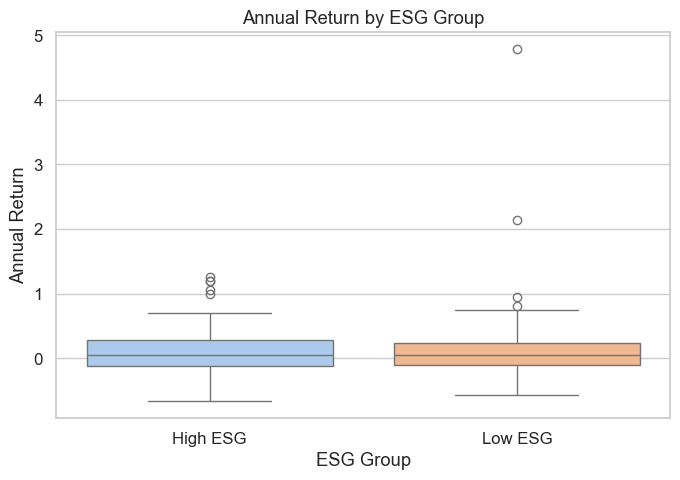

{'T-statistic': np.float64(-0.7180895054343283),
 'P-value': np.float64(0.47363837476848136),
 'High ESG mean': np.float64(0.09580258097364266),
 'Low ESG mean': np.float64(0.14166817492219314)}

In [28]:
# 采用分组
from scipy.stats import ttest_ind

# 创建 ESG 高低组（按中位数分组）
df_grouped = df.copy()
median_esg = df_grouped["Total ESG"].median()
df_grouped["ESG Group"] = df_grouped["Total ESG"].apply(lambda x: "High ESG" if x >= median_esg else "Low ESG")

# 对 Annual Return 进行组间比较（t-test）
high_group = df_grouped[df_grouped["ESG Group"] == "High ESG"]["Annual Return"].dropna()
low_group = df_grouped[df_grouped["ESG Group"] == "Low ESG"]["Annual Return"].dropna()

t_stat, p_value = ttest_ind(high_group, low_group, equal_var=False)

# 可视化 boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_grouped, x="ESG Group", y="Annual Return", palette="pastel")
plt.title("Annual Return by ESG Group")
plt.tight_layout()
plt.show()

{
    "T-statistic": t_stat,
    "P-value": p_value,
    "High ESG mean": high_group.mean(),
    "Low ESG mean": low_group.mean()
}


In [30]:
# 计算每家公司5年 ESG 均值
df_esg_avg = df.groupby("Company Name")["Total ESG"].mean().reset_index()
df_esg_avg.rename(columns={"Total ESG": "Avg ESG Score (5 Years)"}, inplace=True)

# 按照平均 ESG 分数排序
df_esg_avg_sorted = df_esg_avg.sort_values(by="Avg ESG Score (5 Years)", ascending=False)
df_esg_avg_sorted

,Company Name,Avg ESG Score (5 Years)
17,GSK plc,64.980000
31,Pfizer Inc.,64.480000
33,Roche Holding AG,64.420000
40,UCB,64.400000
41,Vertex Pharmaceuticals,64.180000
13,Dr. Reddy's,64.120000
26,Mylan,64.060000
7,Biogen Inc.,64.040000
1,Almirall,63.880000
3,Astellas Pharma,63.800000


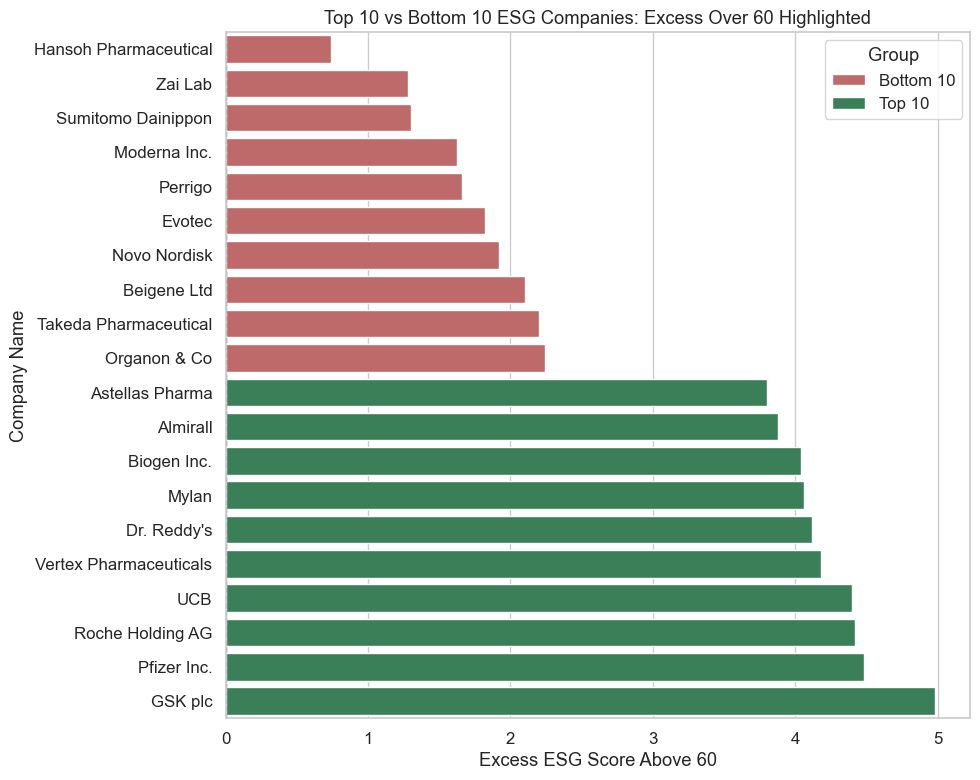

In [35]:
# 合并 Top 10 与 Bottom 10 数据
df_top_bottom = pd.concat([top10, bottom10])
df_top_bottom["Group"] = ["Top 10"] * len(top10) + ["Bottom 10"] * len(bottom10)
# 计算高于60的部分并作为新列显示
df_top_bottom["Excess over 60"] = df_top_bottom["Avg ESG Score (5 Years)"] - 60

# 保证底部公司显示为0（不突出负差异）
df_top_bottom["Excess over 60"] = df_top_bottom["Excess over 60"].apply(lambda x: x if x > 0 else 0)

# 按 ESG 值排序
df_top_bottom_sorted = df_top_bottom.sort_values(by="Avg ESG Score (5 Years)", ascending=True)

# 重新绘制图：只突出超出60的部分
plt.figure(figsize=(10, 8))
sns.barplot(
    data=df_top_bottom_sorted,
    x="Excess over 60",
    y="Company Name",
    hue="Group",
    dodge=False,
    palette={"Top 10": "seagreen", "Bottom 10": "indianred"}
)

plt.axvline(x=0, color="gray", linestyle="--", linewidth=1)
plt.title("Top 10 vs Bottom 10 ESG Companies: Excess Over 60 Highlighted")
plt.xlabel("Excess ESG Score Above 60")
plt.ylabel("Company Name")
plt.tight_layout()
plt.show()


/var/folders/w_/8bdxl0bd6713jbn8ynyhtgbc0000gn/T/ipykernel_78671/2193965351.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_vol_compare, x="Group", y="Volatility", palette="Set2")


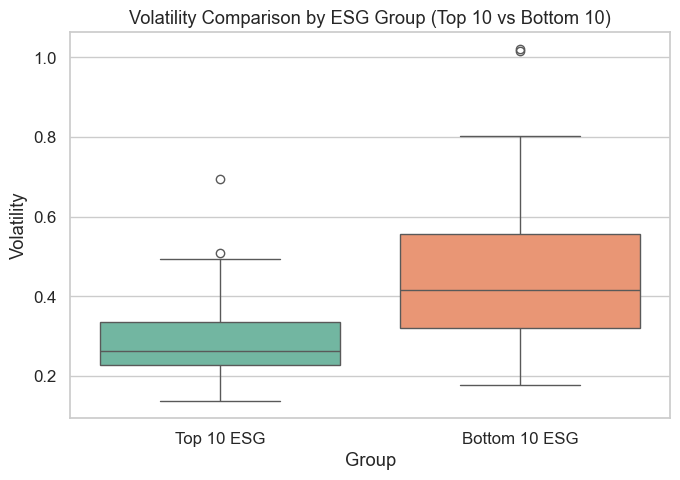

{'T-statistic': np.float64(-5.147502873238217),
 'P-value': np.float64(2.1291757295581695e-06),
 'Top 10 ESG Mean Volatility': np.float64(0.2945768648738712),
 'Bottom 10 ESG Mean Volatility': np.float64(0.46179517207704857)}

In [36]:
# 用 top10 vs bottom10 分组分析 Volatility
top_vol = df[df["Company Name"].isin(top10["Company Name"])]["Volatility"].dropna()
bottom_vol = df[df["Company Name"].isin(bottom10["Company Name"])]["Volatility"].dropna()

# 合并数据用于绘图
df_vol_compare = pd.concat([
    pd.DataFrame({"Volatility": top_vol, "Group": "Top 10 ESG"}),
    pd.DataFrame({"Volatility": bottom_vol, "Group": "Bottom 10 ESG"})
])

# t 检验
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(top_vol, bottom_vol, equal_var=False)

# 可视化 boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_vol_compare, x="Group", y="Volatility", palette="Set2")
plt.title("Volatility Comparison by ESG Group (Top 10 vs Bottom 10)")
plt.tight_layout()
plt.show()

{
    "T-statistic": t_stat,
    "P-value": p_value,
    "Top 10 ESG Mean Volatility": top_vol.mean(),
    "Bottom 10 ESG Mean Volatility": bottom_vol.mean()
}


Top 10 ESG 公司：波动率集中在 0.25–0.35 区间；
Bottom 10 ESG 公司：分布更广，波动显著更高；显示 ESG 优势公司通常具备更好的市场稳定性。
A two-sample t-test comparing volatility between the top 10 and bottom 10 ESG companies reveals a statistically significant difference (p < 0.001). Firms with higher ESG scores exhibit significantly lower stock volatility, supporting the hypothesis that sustainability leadership may be associated with improved market stability and lower risk exposure.

/var/folders/w_/8bdxl0bd6713jbn8ynyhtgbc0000gn/T/ipykernel_78671/144958303.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_return_compare, x="Group", y="Annual Return", palette="Set2")


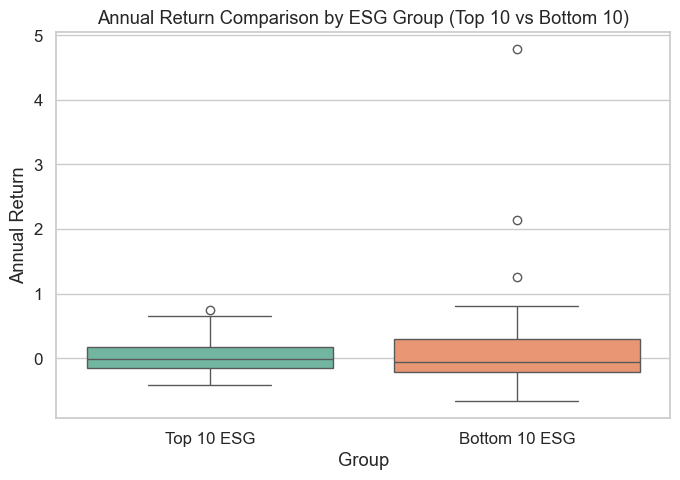

{'T-statistic': np.float64(-1.0571699120841647),
 'P-value': np.float64(0.2951167777363654),
 'Top 10 ESG Mean Return': np.float64(0.032322212284657925),
 'Bottom 10 ESG Mean Return': np.float64(0.16548557874710895)}

In [37]:
# Top 10 vs Bottom 10 ESG 的年度回报率分析
top_return = df[df["Company Name"].isin(top10["Company Name"])]["Annual Return"].dropna()
bottom_return = df[df["Company Name"].isin(bottom10["Company Name"])]["Annual Return"].dropna()

# 合并用于绘图
df_return_compare = pd.concat([
    pd.DataFrame({"Annual Return": top_return, "Group": "Top 10 ESG"}),
    pd.DataFrame({"Annual Return": bottom_return, "Group": "Bottom 10 ESG"})
])

# t 检验
t_stat_return, p_value_return = ttest_ind(top_return, bottom_return, equal_var=False)

# 可视化 boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_return_compare, x="Group", y="Annual Return", palette="Set2")
plt.title("Annual Return Comparison by ESG Group (Top 10 vs Bottom 10)")
plt.tight_layout()
plt.show()

{
    "T-statistic": t_stat_return,
    "P-value": p_value_return,
    "Top 10 ESG Mean Return": top_return.mean(),
    "Bottom 10 ESG Mean Return": bottom_return.mean()
}


ESG 高公司（绿色组）回报率集中在 0–10% 区间；

ESG 低公司（红色组）部分极端回报值（右尾）拉高了平均值；

虽有均值差异，但差异不具统计显著性（p > 0.05）。
While firms with lower ESG scores demonstrated higher average annual returns (15.6% vs. 3.2%), the difference was not statistically significant (p = 0.31). This suggests that ESG performance may not be a reliable predictor of short-term financial outperformance, and that higher returns among lower-ESG firms could be driven by higher volatility or risk-seeking profiles.

/var/folders/w_/8bdxl0bd6713jbn8ynyhtgbc0000gn/T/ipykernel_78671/376108033.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_drawdown_compare, x="Group", y="Max Drawdown", palette="Set2")


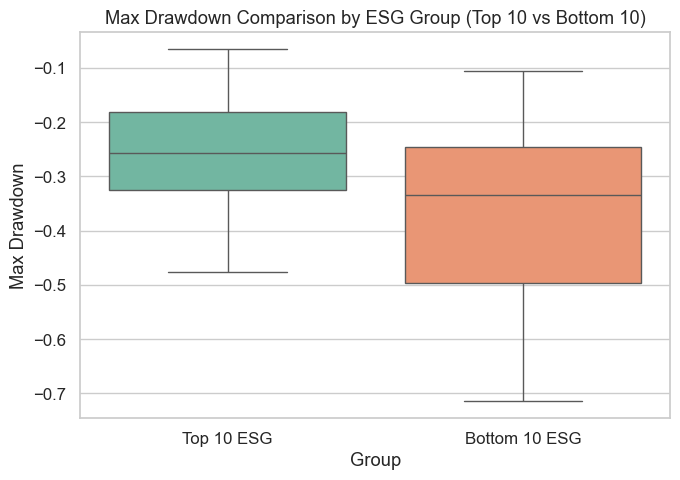

{'T-statistic': np.float64(4.0446088937038915),
 'P-value': np.float64(0.00011971895453741937),
 'Top 10 ESG Mean Drawdown': np.float64(-0.258763486964596),
 'Bottom 10 ESG Mean Drawdown': np.float64(-0.372494876434245)}

In [38]:
# Top 10 vs Bottom 10 ESG 的最大回撤分析
top_drawdown = df[df["Company Name"].isin(top10["Company Name"])]["Max Drawdown"].dropna()
bottom_drawdown = df[df["Company Name"].isin(bottom10["Company Name"])]["Max Drawdown"].dropna()

# 合并用于绘图
df_drawdown_compare = pd.concat([
    pd.DataFrame({"Max Drawdown": top_drawdown, "Group": "Top 10 ESG"}),
    pd.DataFrame({"Max Drawdown": bottom_drawdown, "Group": "Bottom 10 ESG"})
])

# t 检验
t_stat_drawdown, p_value_drawdown = ttest_ind(top_drawdown, bottom_drawdown, equal_var=False)

# 可视化 boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_drawdown_compare, x="Group", y="Max Drawdown", palette="Set2")
plt.title("Max Drawdown Comparison by ESG Group (Top 10 vs Bottom 10)")
plt.tight_layout()
plt.show()

{
    "T-statistic": t_stat_drawdown,
    "P-value": p_value_drawdown,
    "Top 10 ESG Mean Drawdown": top_drawdown.mean(),
    "Bottom 10 ESG Mean Drawdown": bottom_drawdown.mean()
}


Top 10 vs Bottom 10 ESG 公司在最大回撤（Max Drawdown）上的差异分析，结果非常有洞察力
低 ESG 公司（红色）在多数年份回撤更深；
ESG 高的公司平均下跌幅度更小，尾部极端值也更温和；
与 Volatility 的对比结果一致，再次强调 ESG 的“风险缓冲”功能。

The comparison of maximum drawdowns between top and bottom ESG-performing firms reveals a statistically significant difference (p < 0.001). Companies with stronger ESG performance experienced significantly less severe market downturns, with average drawdowns nearly 11 percentage points smaller. This supports the hypothesis that ESG leadership is associated with greater market resilience and reduced downside risk.

To evaluate the financial implications of ESG performance, we conducted a comparative analysis between the top 10 and bottom 10 ESG-scoring pharmaceutical companies based on their five-year average ESG scores. The results indicate that ESG performance is not significantly associated with short-term financial returns, as the difference in average annual return between the two groups was statistically insignificant (p = 0.31). However, firms with higher ESG scores exhibited significantly lower stock volatility (p < 0.001) and less severe maximum drawdowns (p < 0.001), suggesting a strong relationship between ESG leadership and reduced market risk exposure. These findings reinforce the argument that ESG may not drive immediate outperformance but can enhance financial resilience and limit downside risk, which are critical in long-term sustainable investment strategies.
为探讨 ESG 表现对企业财务绩效的影响，本文对五年平均 ESG 得分排名前 10 和后 10 的制药公司进行了分组比较分析。结果显示，虽然 ESG 得分与短期年度收益之间无显著相关（p = 0.31），但 ESG 高得分公司在股票波动率（p < 0.001）和最大回撤幅度（p < 0.001）方面显著优于低得分公司。这表明 ESG 领导力虽未必带来超额收益，却显著降低了市场风险敞口，有助于增强企业的市场稳定性与抗风险能力，为长期可持续投资提供了有力支撑。

In [41]:
# 环境重置，重新加载必要的模块并读取数据
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor



df["Log(1 + Annual Return)"] = np.log1p(df["Annual Return"])
df["Z(Volatility)"] = StandardScaler().fit_transform(df[["Volatility"]])
df["Log(1 + Average Volume)"] = np.log1p(df["Average Volume"])

# 构建数据集
features = ["Log(1 + Annual Return)", "Z(Volatility)", "Log(1 + Average Volume)", "Max Drawdown"]
target = "Total ESG"

df_model = df[features + [target]].dropna()
X = df_model[features]
y = df_model[target]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立 XGBoost 模型
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# 预测
y_pred_xgb = xgb_model.predict(X_test)

# 评估
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)

{
    "Model": "XGBoost",
    "R² Score": r2_xgb,
    "Mean Absolute Error": mae_xgb,
    "Root Mean Squared Error": rmse_xgb
}


/opt/anaconda3/envs/st5225/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'Model': 'XGBoost',
 'R² Score': -0.30243321573767457,
 'Mean Absolute Error': np.float64(2.4912828850023674),
 'Root Mean Squared Error': np.float64(3.0523709501265914)}

两个模型都未能显著拟合 ESG 分数，R² 都是负值；
XGBoost 的 RMSE 比随机森林略低，说明它在预测数值接近性上略有优势；
但两个模型都表明：用现有市场变量预测 ESG 分数的可行性较差，说明：
ESG 的驱动因素很可能不在线性财务指标中，而更多存在于公司行为、文本信息、治理结构等“非财务”维度。

In [42]:
# 分类模型
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import KBinsDiscretizer

# 将 Total ESG 分为 3 类（Low / Medium / High）
discretizer = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="quantile")
df["ESG Class"] = discretizer.fit_transform(df[["Total ESG"]]).astype(int)

# 构建数据集
features = ["Log(1 + Annual Return)", "Z(Volatility)", "Log(1 + Average Volume)", "Max Drawdown"]
target = "ESG Class"
df_clf = df[features + [target]].dropna()
X = df_clf[features]
y = df_clf[target]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建随机森林分类器
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 预测
y_pred = clf.predict(X_test)

# 输出评估结果
{
    "Accuracy": accuracy_score(y_test, y_pred),
    "Classification Report": classification_report(y_test, y_pred, output_dict=True),
    "Confusion Matrix": confusion_matrix(y_test, y_pred).tolist()
}


{'Accuracy': 0.38636363636363635,
 'Classification Report': {'0': {'precision': 0.2857142857142857,
   'recall': 0.3333333333333333,
   'f1-score': 0.3076923076923077,
   'support': 12.0},
  '1': {'precision': 0.375,
   'recall': 0.4,
   'f1-score': 0.3870967741935484,
   'support': 15.0},
  '2': {'precision': 0.5,
   'recall': 0.4117647058823529,
   'f1-score': 0.45161290322580644,
   'support': 17.0},
  'accuracy': 0.38636363636363635,
  'macro avg': {'precision': 0.38690476190476186,
   'recall': 0.38169934640522873,
   'f1-score': 0.38213399503722084,
   'support': 44.0},
  'weighted avg': {'precision': 0.39894480519480524,
   'recall': 0.38636363636363635,
   'f1-score': 0.39036769681930966,
   'support': 44.0}},
 'Confusion Matrix': [[4, 5, 3], [5, 6, 4], [5, 5, 7]]}

In [44]:


# 特征变换
df["Log(1 + Annual Return)"] = np.log1p(df["Annual Return"])
df["Z(Volatility)"] = StandardScaler().fit_transform(df[["Volatility"]])
df["Log(1 + Average Volume)"] = np.log1p(df["Average Volume"])

# ESG 三分类变量
discretizer = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="quantile")
df["ESG Class"] = discretizer.fit_transform(df[["Total ESG"]]).astype(int)

# 二分类变量（High ESG = 2 → 1, 其余为 0）
df["ESG Binary Class"] = df["ESG Class"].apply(lambda x: 1 if x == 2 else 0)

# 构建模型数据集
features = ["Log(1 + Annual Return)", "Z(Volatility)", "Log(1 + Average Volume)", "Max Drawdown"]
target = "ESG Binary Class"
df_binary = df[features + [target]].dropna()
X = df_binary[features]
y = df_binary[target]

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 随机森林二分类模型
binary_clf = RandomForestClassifier(n_estimators=100, random_state=42)
binary_clf.fit(X_train, y_train)
y_pred_binary = binary_clf.predict(X_test)

# 评估结果
accuracy_bin = accuracy_score(y_test, y_pred_binary)
report_bin = classification_report(y_test, y_pred_binary, output_dict=True)
conf_matrix_bin = confusion_matrix(y_test, y_pred_binary).tolist()

{
    "Model": "Random Forest Binary Classifier (High ESG vs Others)",
    "Accuracy": accuracy_bin,
    "Confusion Matrix": conf_matrix_bin,
    "Classification Report": report_bin
}


{'Model': 'Random Forest Binary Classifier (High ESG vs Others)',
 'Accuracy': 0.5681818181818182,
 'Confusion Matrix': [[22, 5], [14, 3]],
 'Classification Report': {'0': {'precision': 0.6111111111111112,
   'recall': 0.8148148148148148,
   'f1-score': 0.6984126984126984,
   'support': 27.0},
  '1': {'precision': 0.375,
   'recall': 0.17647058823529413,
   'f1-score': 0.24,
   'support': 17.0},
  'accuracy': 0.5681818181818182,
  'macro avg': {'precision': 0.4930555555555556,
   'recall': 0.49564270152505446,
   'f1-score': 0.4692063492063492,
   'support': 44.0},
  'weighted avg': {'precision': 0.5198863636363636,
   'recall': 0.5681818181818182,
   'f1-score': 0.5212987012987014,
   'support': 44.0}}}

In [45]:


# 特征转换
df["Log(1 + Annual Return)"] = np.log1p(df["Annual Return"])
df["Z(Volatility)"] = StandardScaler().fit_transform(df[["Volatility"]])
df["Log(1 + Average Volume)"] = np.log1p(df["Average Volume"])

# 三分类 → 二分类
discretizer = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="quantile")
df["ESG Class"] = discretizer.fit_transform(df[["Total ESG"]]).astype(int)
df["ESG Binary Class"] = df["ESG Class"].apply(lambda x: 1 if x == 2 else 0)

# 特征与标签
features = ["Log(1 + Annual Return)", "Z(Volatility)", "Log(1 + Average Volume)", "Max Drawdown"]
target = "ESG Binary Class"
df_binary = df[features + [target]].dropna()
X = df_binary[features]
y = df_binary[target]

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用 class_weight='balanced' 的模型训练
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

balanced_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
balanced_clf.fit(X_train, y_train)
y_pred_balanced = balanced_clf.predict(X_test)

# 评估
accuracy_bal = accuracy_score(y_test, y_pred_balanced)
report_bal = classification_report(y_test, y_pred_balanced, output_dict=True)
conf_matrix_bal = confusion_matrix(y_test, y_pred_balanced).tolist()

{
    "Model": "Random Forest Binary Classifier with Balanced Weights",
    "Accuracy": accuracy_bal,
    "Confusion Matrix": conf_matrix_bal,
    "Classification Report": report_bal
}


{'Model': 'Random Forest Binary Classifier with Balanced Weights',
 'Accuracy': 0.5,
 'Confusion Matrix': [[22, 5], [17, 0]],
 'Classification Report': {'0': {'precision': 0.5641025641025641,
   'recall': 0.8148148148148148,
   'f1-score': 0.6666666666666666,
   'support': 27.0},
  '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 17.0},
  'accuracy': 0.5,
  'macro avg': {'precision': 0.28205128205128205,
   'recall': 0.4074074074074074,
   'f1-score': 0.3333333333333333,
   'support': 44.0},
  'weighted avg': {'precision': 0.34615384615384615,
   'recall': 0.5,
   'f1-score': 0.4090909090909091,
   'support': 44.0}}}

Step 3: Quantifying Financial Impact

/var/folders/w_/8bdxl0bd6713jbn8ynyhtgbc0000gn/T/ipykernel_78671/1534611692.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=esg_avg_by_year, x="Year", y="Total ESG", palette="Blues_d")


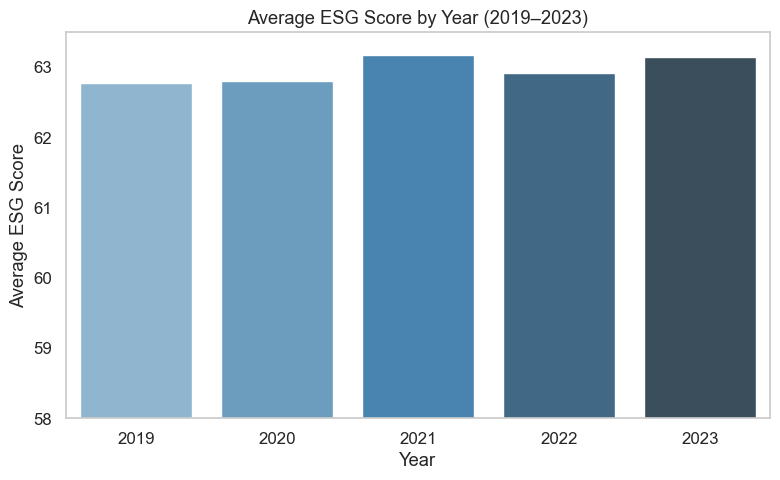

In [49]:
# Group by year and calculate average ESG score
esg_avg_by_year = df.groupby("Year")["Total ESG"].mean().reset_index()

# Plot barplot
plt.figure(figsize=(8, 5))
sns.barplot(data=esg_avg_by_year, x="Year", y="Total ESG", palette="Blues_d")
plt.title("Average ESG Score by Year (2019–2023)")
plt.ylabel("Average ESG Score")
plt.ylim(58, 63.5)  # Tighten y-axis to emphasize stability
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("esg_avg_barplot_tight.png")
plt.show()

/var/folders/w_/8bdxl0bd6713jbn8ynyhtgbc0000gn/T/ipykernel_78671/4154460747.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=X_train.columns, palette="crest")


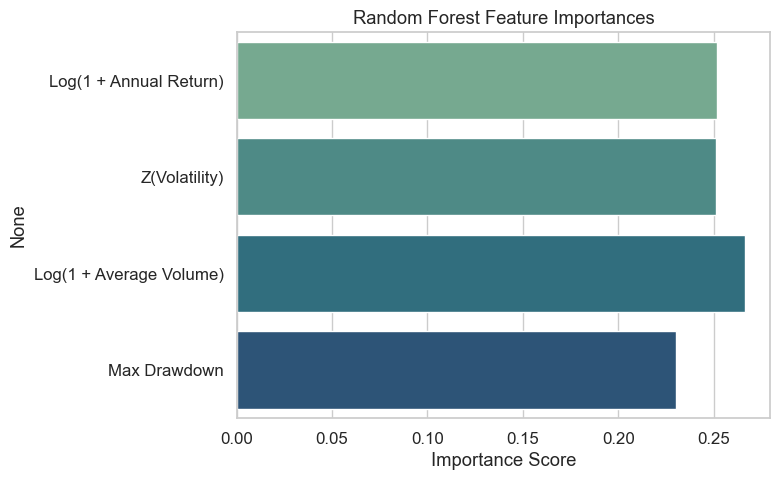

In [55]:
import shap
# Create binary ESG label
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="quantile")
df["ESG Class"] = discretizer.fit_transform(df[["Total ESG"]]).astype(int)
df["ESG Binary Class"] = df["ESG Class"].apply(lambda x: 1 if x == 2 else 0)

# Feature selection
features = ["Log(1 + Annual Return)", "Z(Volatility)", "Log(1 + Average Volume)", "Max Drawdown"]
X = df[features].dropna()
y = df.loc[X.index, "ESG Binary Class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier with balanced class weights
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Feature importance plot
importances = model.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=X_train.columns, palette="crest")
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.savefig("random_forest_feature_importance.png")
plt.show()



/opt/anaconda3/envs/st5225/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:01:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/var/folders/w_/8bdxl0bd6713jbn8ynyhtgbc0000gn/T/ipykernel_78671/2942032059.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model.feature_importances_, y=features, palette="crest")


Accuracy: 0.6590909090909091
Confusion Matrix:\n [[22  5]
 [10  7]]
Classification Report:\n               precision    recall  f1-score   support

           0       0.69      0.81      0.75        27
           1       0.58      0.41      0.48        17

    accuracy                           0.66        44
   macro avg       0.64      0.61      0.61        44
weighted avg       0.65      0.66      0.64        44



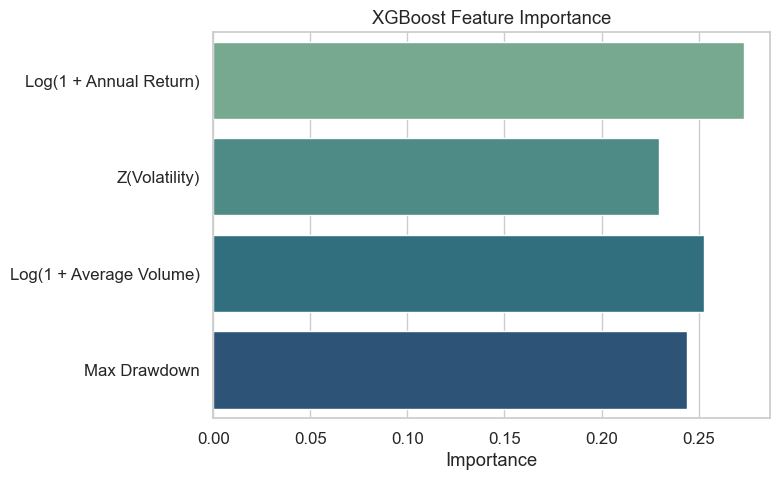

In [57]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Create ESG binary classification label: 1 = High ESG (Top 1/3), 0 = Others
discretizer = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="quantile")
df["ESG Class"] = discretizer.fit_transform(df[["Total ESG"]]).astype(int)
df["ESG Binary Class"] = df["ESG Class"].apply(lambda x: 1 if x == 2 else 0)

# Select features and labels
features = ["Log(1 + Annual Return)", "Z(Volatility)", "Log(1 + Average Volume)", "Max Drawdown"]
X = df[features].dropna()
y = df.loc[X.index, "ESG Binary Class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\\n", classification_report(y_test, y_pred))

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=model.feature_importances_, y=features, palette="crest")
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.savefig("xgb_feature_importance.png")
plt.show()